# Project One - Data Exploration


In [1]:
# Dependencies
import pandas as pd
import requests
import json
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

# Google API Key
from config import gkey


In [2]:
# Source files
attendance_raw = 'Resources/Raw/National_Park_Attendance_Prev3Y.xlsx'
park_info = 'Resources/Raw/National_Park_Locations.xlsx'
state_orders = 'Resources/Raw/state_orders.xlsx'
wildfires = '/Users/laurelwilliamson/Desktop/GITHUB/group_project/ProjectOne/Resources/Wildfire_Perimeters (1).csv'
more_park_info = '/Users/laurelwilliamson/Desktop/GITHUB/group_project/ProjectOne/Resources/Raw/data.json'

# Read data and store in dataframe
attendance_data = pd.read_excel(attendance_raw)
park_info_data = pd.read_excel(park_info)
emergency_orders_data = pd.read_excel(state_orders)
wildfire_data = pd.read_csv(wildfires)
more_park_data = pd.read_json(more_park_info)

FileNotFoundError: [Errno 2] File /Users/laurelwilliamson/Desktop/GITHUB/group_project/ProjectOne/Resources/Wildfire_Perimeters (1).csv does not exist: '/Users/laurelwilliamson/Desktop/GITHUB/group_project/ProjectOne/Resources/Wildfire_Perimeters (1).csv'

## Import, filter, and clean base park data

In [3]:
# Limit park info dataframe to West Coast
national_parks = park_info_data.loc[(park_info_data['ParkType']=='National Park')]
focus_parks = pd.DataFrame(national_parks.loc[(park_info_data['State'] == 'CA') | (park_info_data['State'] == 'OR') | (park_info_data['State'] == 'WA')])
focus_parks.reset_index()

focus_parks['FullName'] = focus_parks['Park'].str.replace(['NP'],'')#+focus_parks['ParkType'])

focus_parks['FullName']=focus_parks['Park'].str[:-2]+focus_parks['ParkType']

focus_parks.head()

,Park,UnitCode,ParkType,Region,State,FullName
63,Channel Islands NP,CHIS,National Park,Pacific West,CA,Channel Islands National Park
79,Crater Lake NP,CRLA,National Park,Pacific West,OR,Crater Lake National Park
87,Death Valley NP,DEVA,National Park,Pacific West,CA,Death Valley National Park
191,Joshua Tree NP,JOTR,National Park,Pacific West,CA,Joshua Tree National Park
198,Kings Canyon NP,KICA,National Park,Pacific West,CA,Kings Canyon National Park


## Bring in geocoordinates via Google Maps API

In [4]:
# Build URL using the Google Maps API

lats=[]
longs=[]
cost=[]

base_url = "https://maps.googleapis.com/maps/api/geocode/json"

for Park in focus_parks['FullName']:
    params = {"address": Park, "key": gkey}
    response = requests.get(base_url, params=params)
    park_geo = response.json()
    lats.append(park_geo["results"][0]["geometry"]["location"]["lat"])
    longs.append(park_geo["results"][0]["geometry"]["location"]["lng"])           
    

In [5]:
# Add geocoordinates to dataframe
focus_parks['Latitude']=lats
focus_parks['Longitude']=longs
focus_parks.head()

,Park,UnitCode,ParkType,Region,State,FullName,Latitude,Longitude
63,Channel Islands NP,CHIS,National Park,Pacific West,CA,Channel Islands National Park,34.006936,-119.778533
79,Crater Lake NP,CRLA,National Park,Pacific West,OR,Crater Lake National Park,42.868441,-122.168479
87,Death Valley NP,DEVA,National Park,Pacific West,CA,Death Valley National Park,36.505389,-117.079408
191,Joshua Tree NP,JOTR,National Park,Pacific West,CA,Joshua Tree National Park,33.873415,-115.900992
198,Kings Canyon NP,KICA,National Park,Pacific West,CA,Kings Canyon National Park,36.887855,-118.555148


In [6]:
# Create 'clean' Excel file with focus park geocoordiantes
focus_parks.to_excel('Resources/Clean/Clean_ParkGeocoordinates.xlsx',
             sheet_name='Park Geocoordinates')  

## Combine base park data, visitor counts, and geocoordinate data

In [7]:
# Combine the data into a single dataframe  
park_data = pd.merge(focus_parks, attendance_data, how="left", on=["Park", "Park"])
park_data.head()

,Park,UnitCode,ParkType,Region,State,FullName,Latitude,Longitude,Code,Month,Visitors
0,Channel Islands NP,CHIS,National Park,Pacific West,CA,Channel Islands National Park,34.006936,-119.778533,CHIS,2020-01-01,19555.0
1,Channel Islands NP,CHIS,National Park,Pacific West,CA,Channel Islands National Park,34.006936,-119.778533,CHIS,2020-02-01,19682.0
2,Channel Islands NP,CHIS,National Park,Pacific West,CA,Channel Islands National Park,34.006936,-119.778533,CHIS,2020-03-01,9913.0
3,Channel Islands NP,CHIS,National Park,Pacific West,CA,Channel Islands National Park,34.006936,-119.778533,CHIS,2020-04-01,113.0
4,Channel Islands NP,CHIS,National Park,Pacific West,CA,Channel Islands National Park,34.006936,-119.778533,CHIS,2020-05-01,1618.0


In [8]:
park_data['Calendar Year'] = pd.DatetimeIndex(park_data['Month']).year
park_data['Calendar Month'] = pd.DatetimeIndex(park_data['Month']).month

park_data = park_data.set_index('FullName')

park_data.head(50)

,Park,UnitCode,ParkType,Region,State,Latitude,Longitude,Code,Month,Visitors,Calendar Year,Calendar Month
FullName,,,,,,,,,,,,
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-01-01,19555.0,2020,1
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-02-01,19682.0,2020,2
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-03-01,9913.0,2020,3
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-04-01,113.0,2020,4
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-05-01,1618.0,2020,5
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-06-01,7088.0,2020,6
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-07-01,9999.0,2020,7
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-08-01,11694.0,2020,8
Channel Islands National Park,Channel Islands NP,CHIS,National Park,Pacific West,CA,34.006936,-119.778533,CHIS,2020-09-01,8487.0,2020,9


In [9]:
# Create 'clean' Excel file with pertinent park data
park_data.to_excel('Resources/Clean/Clean_ParkData.xlsx',
             sheet_name='Park Data')  

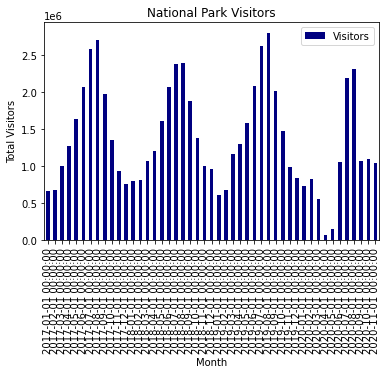

In [10]:
# Generate a bar plot for visitors by month 
argh_group = park_data.groupby('Month')
measures = pd.DataFrame(argh_group['Visitors'].sum())

drug_chart=measures.plot(kind='bar', title='National Park Visitors', color='navy')

drug_chart.set_xlabel('Month')
drug_chart.set_ylabel('Total Visitors')

plt.show()

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the visutors for each calendar year
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean = park_data.groupby('Calendar Year').mean()['Visitors']
median = park_data.groupby('Calendar Year').median()['Visitors']
variance = park_data.groupby('Calendar Year').var()['Visitors']
std_dev = park_data.groupby('Calendar Year').std()['Visitors']
SEM = park_data.groupby('Calendar Year').sem()['Visitors']

# Assemble the resulting series into a single summary dataframe.
park_stats = pd.DataFrame({'Mean': mean,
              'Median':median,
              'Variance': variance,
              'Standard Deviation': std_dev,
                         'SEM':SEM})
park_stats.head(12)

,Mean,Median,Variance,Standard Deviation,SEM
Calendar Year,,,,,
2017,112812.429487,58283.5,2.080075e+10,144224.659279,11547.214212
2018,112199.730769,61345.5,1.682381e+10,129706.619776,10384.840781
2019,116213.320513,61149.0,2.174953e+10,147477.208613,11807.626572
2020,77289.272727,24128.0,1.320128e+10,114896.815200,9608.154369


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# Google take the wheel ...
summary_stats= park_data.groupby('Park').agg({'Visitors':['mean','median','var','std','sem']})
summary_stats

Visitors                                         \
                             mean    median           var            std   
Park                                                                       
Channel Islands NP   27484.297872   26302.0  1.832456e+08   13536.825577   
Crater Lake NP       59177.021277   21309.0  4.604204e+09   67854.283004   
Death Valley NP     115497.978723  122013.0  1.951054e+09   44170.739525   
Joshua Tree NP      232243.617021  233995.0  8.984922e+09   94788.830975   
Kings Canyon NP      51721.340426   40030.0  1.436163e+09   37896.743394   
Lassen Volcanic NP   41899.361702   12879.0  1.754974e+09   41892.415390   
Mount Rainier NP    117973.361702   74355.0  1.399575e+10  118303.654303   
North Cascades NP     2755.297872     198.0  1.681849e+07    4101.035579   
Olympic NP          257574.468085  182944.0  4.387051e+10  209452.883860   
Pinnacles NP         16544.914894   15829.0  4.572308e+07    6761.884388   
Redwood NP           35815.212766   30938.0  3.509364e+08   18733.297810   
Sequoia NP           96466.787234   83442.0  3.839955e+09   61967.369821   
Yosemite NP         312581.255319  278349.0  3.944555e+10  198609.036258   

                                  
                             sem  
Park                              
Channel Islands NP   1974.548948  
Crater Lake NP       9897.564413  
Death Valley NP      6442.964545  
Joshua Tree NP      13826.372024  
Kings Canyon NP      5527.808153  
Lassen Volcanic NP   6110.636815  
Mount Rainier NP    17256.361529  
North Cascades NP     598.197520  
Olympic NP          30551.843123  
Pinnacles NP          986.322209  
Redwood NP           2732.532326  
Sequoia NP           9038.869872  
Yosemite NP         28970.105385

In [13]:
# Split up our data into groups based upon 'Calendar Year' and 'Calendar Month'
year_groups = park_data.groupby(['Calendar Year','Calendar Month'])

# Create a new variable that holds the sum of our groups
monthly_summary = year_groups.sum()
monthly_summary.head(50)


Latitude    Longitude   Visitors
Calendar Year Calendar Month                                    
2017          1               520.148799 -1564.824142   662187.0
              2               520.148799 -1564.824142   671480.0
              3               520.148799 -1564.824142   992657.0
              4               520.148799 -1564.824142  1266715.0
              5               520.148799 -1564.824142  1637021.0
              6               520.148799 -1564.824142  2061602.0
              7               520.148799 -1564.824142  2585434.0
              8               520.148799 -1564.824142  2707533.0
              9               520.148799 -1564.824142  1970603.0
              10              520.148799 -1564.824142  1346373.0
              11              520.148799 -1564.824142   936351.0
              12              520.148799 -1564.824142   760783.0
2018          1               520.148799 -1564.824142   789501.0
              2               520.148799 -1564.824142   808170.0
              3               520.148799 -1564.824142  1064691.0
              4               520.148799 -1564.824142  1195308.0
              5               520.148799 -1564.824142  1608871.0
              6               520.148799 -1564.824142  2065430.0
              7               520.148799 -1564.824142  2374889.0
              8               520.148799 -1564.824142  2393532.0
              9               520.148799 -1564.824142  1871944.0
              10              520.148799 -1564.824142  1379187.0
              11              520.148799 -1564.824142   993563.0
              12              520.148799 -1564.824142   958072.0
2019          1               520.148799 -1564.824142   605921.0
              2               520.148799 -1564.824142   670046.0
              3               520.148799 -1564.824142  1155917.0
              4               520.148799 -1564.824142  1290567.0
              5               520.148799 -1564.824142  1582516.0
              6               520.148799 -1564.824142  2081930.0
              7               520.148799 -1564.824142  2624976.0
              8               520.148799 -1564.824142  2805117.0
              9               520.148799 -1564.824142  2014533.0
              10              520.148799 -1564.824142  1474949.0
              11              520.148799 -1564.824142   989485.0
              12              520.148799 -1564.824142   833321.0
2020          1               520.148799 -1564.824142   732397.0
              2               520.148799 -1564.824142   819186.0
              3               520.148799 -1564.824142   550521.0
              4               520.148799 -1564.824142    66384.0
              5               520.148799 -1564.824142   150094.0
              6               520.148799 -1564.824142  1046707.0
              7               520.148799 -1564.824142  2185952.0
              8               520.148799 -1564.824142  2309622.0
              9               520.148799 -1564.824142  1065666.0
              10              520.148799 -1564.824142  1091669.0
              11              520.148799 -1564.824142  1034168.0

In [95]:
# Create 'clean' Excel file with summary of vistors by month year-over-year
monthly_summary.to_excel('Resources/Clean/Clean_YOY_MonthlyVisitors.xlsx',
             sheet_name='Year-Over-Year Visitors Summary')  

## Wildfire Data

In [13]:
#Preview
wildfire_data.head()

,OBJECTID,IncidentName,FeatureCategory,MapMethod,Comments,GISAcres,Label,FeatureAccess,FeatureStatus,IsVisible,...,GACC,IMTName,UnitID,LocalIncidentID,IRWINID,GeometryID,GlobalID,GlobalID_2,SHAPE_Length,SHAPE_Area
0,86547,Bradbury Krebs,Wildfire Daily Fire Perimeter,Remote Sensing Derived,NaN,96.387621,NaN,Public,Approved,Yes,...,RMCC,NaN,NaN,NaN,NaN,NaN,016394ae-ee1b-4a97-bbb8-eac4cb650178,{1BE763D8-687D-44DB-A01A-43E1DE6E219A},0.026316,0.000041
1,89869,Cottonwood,Wildfire Daily Fire Perimeter,Mixed Methods,NaN,5.981838,NaN,Public,Approved,Yes,...,GBCC,NaN,IDTFD,000073,{B3FAE568-6B2E-43CB-9767-7273D7C29B28},NaN,2031a057-2e4d-45ff-9bf7-950250c590a8,{8B4D7AEC-226E-4043-8AF9-F1F9DFE470E4},0.008370,0.000003
2,89870,FLAT TOP,Wildfire Daily Fire Perimeter,GPS-Flight,Utilization of drone to aerial map fire perime...,374.443632,NaN,Public,Approved,Yes,...,RMCC,NaN,WYCOX,200144,{6EBEA127-231D-4EE1-8A6A-39F034B1752C},NaN,d6fb873a-01ea-495c-829b-d3d89c14d3cc,{1D7EE141-27D5-4F66-9311-C217A15BA0AA},0.072647,0.000167
3,89877,Lincoln,Wildfire Daily Fire Perimeter,Mixed Methods,NaN,43.376002,NaN,Public,Approved,Yes,...,GBCC,NaN,UTSLD,000296,{83840CC1-B9E8-4E8F-B1B5-353E02A08A73},NaN,a6f5723b-f060-4083-996c-1c3ae14ded37,{019C0D34-B99B-4CCE-A479-6D402D23F969},0.023222,0.000019
4,89882,Moore Mountain,Wildfire Daily Fire Perimeter,Digitized-Image,NaN,11.501785,"Moore Mtn, 2020",Public,Approved,Yes,...,SACC,NaN,VAVAS,Moore Mtn,{9BC142C4-6A28-4EF6-B683-438DCDF13706},NaN,db4cfe17-fe55-437e-b767-023a6b6af3a0,{298BEC61-E2CC-4532-96DE-21A60A0A2B22},0.011176,0.000005


In [14]:
#Eliminate unneccessary columns
wildfires_df = wildfire_data[['IncidentName', 'CreateDate']].copy()
wildfires_df.head()

#Export as CSV
fires_df.to_csv(r'/Users/laurelwilliamson/Desktop/GITHUB/group_project/ProjectOne/Resources/2020wildfires.csv', index = False)

,IncidentName,CreateDate
0,Bradbury Krebs,2020/07/01 22:37:53
1,Cottonwood,2020/07/10 20:22:46
2,FLAT TOP,2020/07/10 20:24:01
3,Lincoln,2020/06/19 21:54:43
4,Moore Mountain,2020/07/10 20:21:31


## State Emergency Orders Related to COVID

In [85]:
# Limit emergency order dataframe to West Coast
all_orders = pd.DataFrame(emergency_orders_data.loc[(emergency_orders_data['policy_level'] == 'state') & (emergency_orders_data['start_stop'] == 'start')])
emergency_orders = pd.DataFrame(all_orders.loc[(all_orders['policy_type'] == 'Entertainment') | (all_orders['policy_type'] == 'Food and Drink') | (all_orders['policy_type'] == 'Gyms') | (all_orders['policy_type'] == 'Non-Essential Businesses')])
state_restrictions = pd.DataFrame(emergency_orders.loc[(emergency_orders['state_id'] == 'CA') | (emergency_orders['state_id'] == 'OR') | (emergency_orders['state_id'] == 'WA')])
state_restrictions.reset_index()

state_restrictions.head(20)

,state_id,county,fips_code,policy_level,date,policy_type,start_stop,comments,source,total_phases
501,CA,NaN,NaN,state,2020-05-08,Entertainment,start,Policy_Details: Stage 2 allows gradual reopeni...,sip_submission_form: https://www.gov.ca.gov/wp...,NaN
628,OR,NaN,NaN,state,2020-05-15,Non-Essential Businesses,start,Policy_Details: Currently open: Grocery stores...,sip_submission_form: https://govstatus.egov.co...,NaN
768,OR,NaN,NaN,state,2020-05-15,Food and Drink,start,"Policy_Details: ""Restaurants and bars must:\r\...",sip_submission_form: https://govstatus.egov.co...,NaN
1198,CA,NaN,NaN,state,2020-03-19,Gyms,start,Other measures and details for this policy inc...,BU COVID-19 State Policy Database,NaN
1453,WA,NaN,NaN,state,2020-05-05,Non-Essential Businesses,start,"Policy_Details: "" Essential businesses open\r\...",sip_submission_form: https://www.governor.wa.g...,NaN
1660,OR,NaN,NaN,state,2020-05-15,Food and Drink,start,Policy_Details: Currently open: Grocery stores...,sip_submission_form: https://govstatus.egov.co...,NaN
1678,WA,NaN,NaN,state,2020-03-16,Gyms,start,Other measures and details for this policy inc...,BU COVID-19 State Policy Database,NaN
1942,OR,NaN,NaN,state,2020-05-15,Entertainment,start,"Policy_Details: ""Restaurants and bars must:\r\...",sip_submission_form: https://govstatus.egov.co...,NaN
1943,OR,NaN,NaN,state,2020-05-15,Entertainment,start,Policy_Details: Currently open: Grocery stores...,sip_submission_form: https://govstatus.egov.co...,NaN
1969,WA,NaN,NaN,state,2020-05-05,Food and Drink,start,"Policy_Details: "" Essential businesses open\r\...",sip_submission_form: https://www.governor.wa.g...,NaN


In [86]:
# Create 'clean' Excel file with pertinent state emergency orders
state_restrictions.to_excel('Resources/Clean/Clean_EmergencyOrders.xlsx',
             sheet_name='State Emergency Orders')  

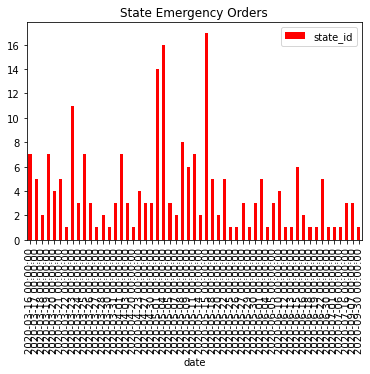

In [67]:
# Generate a bar plot for state orders 
ugh_group = emergency_orders.groupby('date')
measures = pd.DataFrame(ugh_group['state_id'].count())

state_order_chart=measures.plot(kind='bar', title='State Emergency Orders', color='red')

plt.show()

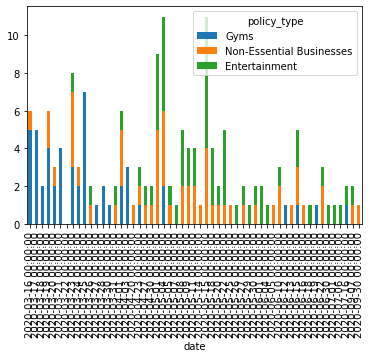

In [68]:
state_order_type = emergency_orders.groupby(['date', 'policy_type'])['state_id'].count().unstack('policy_type').fillna(0)
state_order_type[['Gyms','Non-Essential Businesses', 'Entertainment']].plot(kind='bar', stacked=True)


In [9]:
#Preview
more_park_data.head()

,area,coordinates,date_established_readable,date_established_unix,description,image,nps_link,states,title,id,visitors,world_heritage_site
0,"{'acres': '49,057.36', 'square_km': '198.5'}","{'latitude': 44.35, 'longitude': -68.21}","February 26, 1919",-1604599200,Covering most of Mount Desert Island and other...,"{'url': 'acadia.jpg', 'attribution': 'PixelBay...",https://www.nps.gov/acad/index.htm,"[{'id': 'state_maine', 'title': 'Maine'}]",Acadia,park_acadia,"3,303,393",False
1,"{'acres': '8,256.67', 'square_km': '33.4'}","{'latitude': -14.25, 'longitude': -170.68}","October 31, 1988",594280800,The southernmost National Park is on three Sam...,"{'url': 'american-samoa.jpg', 'attribution': '...",https://www.nps.gov/npsa/index.htm,"[{'id': 'state_american-samoa', 'title': 'Amer...",American Samoa,park_american-samoa,"28,892",False
2,"{'acres': '76,678.98', 'square_km': '310.3'}","{'latitude': 38.68, 'longitude': -109.57}","November 12, 1971",58773600,"This site features more than 2,000 natural san...","{'url': 'arches.jpg', 'attribution': 'PixelBay...",https://www.nps.gov/arch/index.htm,"[{'id': 'state_utah', 'title': 'Utah'}]",Arches,park_arches,"1,585,718",False
3,"{'acres': '242,755.94', 'square_km': '982.4'}","{'latitude': 43.75, 'longitude': -102.5}","November 10, 1978",279525600,"The Badlands are a collection of buttes, pinna...","{'url': 'badlands.jpg', 'attribution': 'PixelB...",https://www.nps.gov/badl/index.htm,"[{'id': 'state_south-dakota', 'title': 'South ...",Badlands,park_badlands,"996,263",False
4,"{'acres': '801,163.21', 'square_km': '3,242.2'}","{'latitude': 29.25, 'longitude': -103.25}","June 12, 1944",-806439600,Named for the prominent bend in the Rio Grande...,"{'url': 'big-bend.jpg', 'attribution': 'PixelB...",https://www.nps.gov/bibe/index.htm,"[{'id': 'state_texas', 'title': 'Texas'}]",Big Bend,park_big-bend,"388,290",False


In [10]:
#Grab info from necessary parks
parks_info = []
for index, row in more_park_data.iterrows():
    if row['title'] == "Redwood":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Yosemite":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Sequoia":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Death Valley":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Joshua Tree":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Channel Islands":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Lassen Volcanic":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Pinnacles":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Kings Canyon":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Biscayne":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Dry Tortugas":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
    elif row['title'] == "Everglades":
        park = row["title"], row["coordinates"]
        parks_info.append(park)
        
#Create and format Dataframe
califl_df = pd.DataFrame(parks_info)
califlo_df = califl_df.rename(columns={0: "National Park", 1: "Coordinates"})

#Preview
califlo_df.head()
#Save as usable CSV
califlo_df.to_csv(r'/Users/laurelwilliamson/Desktop/GITHUB/group_project/ProjectOne/Resources/CaliFlo.csv', index = False)



,National Park,Coordinates
0,Biscayne,"{'latitude': 25.65, 'longitude': -80.08}"
1,Channel Islands,"{'latitude': 34.01, 'longitude': -119.42}"
2,Death Valley,"{'latitude': 36.24, 'longitude': -116.82}"
3,Dry Tortugas,"{'latitude': 24.63, 'longitude': -82.87}"
4,Everglades,"{'latitude': 25.32, 'longitude': -80.93}"
